From the titanic data, we will see who survived and who did not.

In [1]:
import pandas as pd
import numpy as np

In [4]:
df= pd.read_csv("D:/iAnalyst/Machine Learning/Decision Tree/Titanic/titanic_train.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning

Very important way of dealing with null values= #https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/

In [6]:
df.info()  

#Another way of finding missing values  

print(df.isnull().sum())    #Age and Cabin has missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
##deleting non required variables. Also Cabin as it has a lot of null values

todrop= ['Name','PassengerId','Ticket','Cabin']  
df= df.drop(todrop,axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
#filling the missing values by their mode

df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode())
df.Embarked.isnull().count

<bound method Series.count of 0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool>

In [9]:
#filling the missing ages by their median

df['Age']=df['Age'].fillna(df['Age'].median())  
#df.info()

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [10]:
#Using Label encoding
from sklearn.preprocessing import LabelEncoder

labEn= LabelEncoder()
df['Sex'] = labEn.fit_transform(df['Sex'])  
#df['Sex']  #converted to 0= female, 1=male

df.Embarked =labEn.fit_transform(df['Embarked'])
df.Embarked

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32

In [11]:
df.shape

(891, 8)

# Training the model

In [12]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import auc, roc_auc_score, accuracy_score, classification_report
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,RepeatedStratifiedKFold #use it while doing grid search

In [13]:
#Try using Grid search. It uses all the possible combination of parameters. a dict needs to be created first- check google
#dtree= DecisionTreeClassifier()
#GridSearchCV(dtree,cv=10)

In [14]:
X= df.drop('Survived', axis=1)
y= df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=101)

# Trying for Decision tree, RF, Adaboost and gradient boosting on the titanic data

In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [52]:
#Fitting decision tree
dtree= DecisionTreeClassifier(min_samples_leaf=10,random_state=101)
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
accuracy_score(y_test, y_pred)

0.8044692737430168

OR

In [ ]:
#Fit a Random Forest model
rf = RandomForestClassifier(n_estimators=100, max_features=4,
                             max_depth=10,min_samples_split=20) #max_features=4
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)
print(rf)

OR

In [ ]:
# Fit a AdaBoost model
ada = AdaBoostClassifier(n_estimators=100,learning_rate=0.3)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(ada)

OR

In [127]:
#Fit a Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100,max_depth=3, random_state=6)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(gb)

0.8379888268156425
GradientBoostingClassifier(random_state=6)


In [21]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear',random_state = 0,probability=True)#, C=0.05) # poly,rbf,linear
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

#when kernel= linear, remove c. Time taken for linear without feature scaling is 3 minutes

array([[88, 11],
       [26, 54]], dtype=int64)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83        99
           1       0.83      0.68      0.74        80

    accuracy                           0.79       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.79      0.79       179



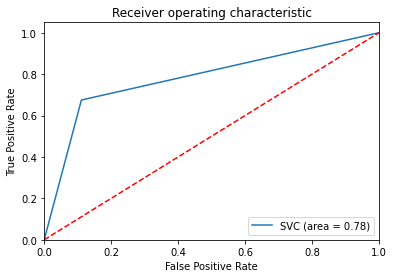

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
SVC_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict(X_test))   #this fn returns 3 values. thats why 3 names  
plt.figure()
plt.plot(fpr, tpr, label='SVC (area = %0.2f)' % SVC_roc_auc)  
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])          #can be used to set or get limits for X-axis
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [30]:
print(accuracy_score(y_test, y_pred))

0.7932960893854749


In [ ]:
#AUC score is close to accuracy. There is not much imbalance in the data.

# Building model on the validation dataset

In [32]:
#Performing the same data cleaning and preprocessing techniques as for train data.
t= pd.read_csv("D:/iAnalyst/Machine Learning/Decision Tree/Titanic/titanic_test.csv")
test= t.copy()

todrop= ['Name','PassengerId','Ticket','Cabin']  
test= test.drop(todrop,axis=1)
test.head()

test['Embarked']=test['Embarked'].fillna(test['Embarked'].mode())
test.Embarked.isnull().count

test['Age']=test['Age'].fillna(test['Age'].median())
test['Fare']=test['Fare'].fillna(test['Fare'].mean())

test['Sex'] = labEn.fit_transform(test['Sex']) 
#print(X_test['Sex'])

test.Embarked =labEn.fit_transform(test['Embarked'])

In [33]:
#test.isnull().sum()

In [35]:
pred = classifier.predict(test)

In [36]:
t['Survived']= pred

In [37]:
output= t[['PassengerId','Survived']]
output.to_csv('Submission5.csv', index=None)

In [ ]:
## Got 0.75119 accuracy when submitted to Kaggle 